# Regras de Associação


In [113]:
import os

import pandas as pd
import seaborn as sns
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

### Análise Exploratória

In [83]:
df = pd.read_csv("data/data.csv")
df

,idUsuario,artista,sexo,pais
0,5,dream theater,m,Finland
1,5,ac/dc,m,Finland
2,5,metallica,m,Finland
3,5,iron maiden,m,Finland
4,5,bob marley & the wailers,m,Finland
...,...,...,...,...
58450,19714,led zeppelin,m,United Kingdom
58451,19714,slipknot,m,United Kingdom
58452,19714,children of bodom,m,United Kingdom
58453,19714,vader,m,United Kingdom


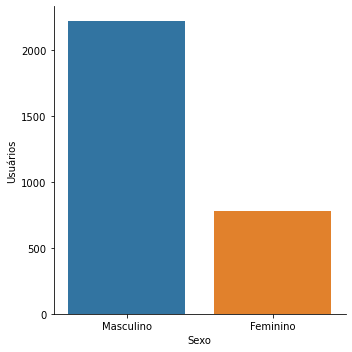

In [84]:
g = sns.catplot(data=df.groupby("idUsuario").first(), x="sexo", kind="count")
g.set_ylabels("Usuários")
g.set_xlabels("Sexo")
g.set_xticklabels(["Masculino", "Feminino"])

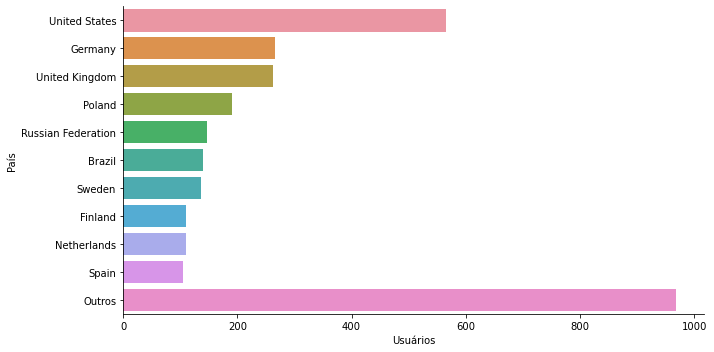

In [85]:
df_gp = df.groupby("idUsuario").first()

freq = list(df_gp["pais"].value_counts().index[:10])

df_in = df_gp[df_gp["pais"].isin(freq)]
df_out = df_gp[~df_gp["pais"].isin(freq)].copy()
df_out["pais"] = "Outros"

g = sns.catplot(
    data=pd.concat([df_in, df_out]),
    y="pais",
    kind="count",
    aspect=2,
    order=freq + ["Outros"],
    orient="h",
)
g.set_ylabels("País")
g.set_xlabels("Usuários")

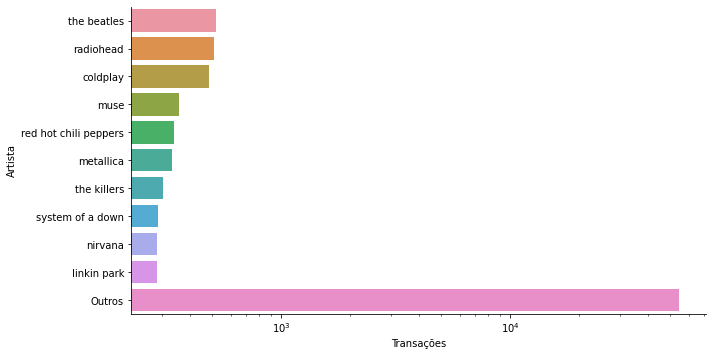

In [86]:
freq = list(df["artista"].value_counts().index[:10])

df_in = df[df["artista"].isin(freq)]
df_out = df[~df["artista"].isin(freq)].copy()
df_out["artista"] = "Outros"

g = sns.catplot(
    data=pd.concat([df_in, df_out]),
    y="artista",
    kind="count",
    aspect=2,
    order=freq + ["Outros"],
    orient="h",
)
g.set_ylabels("Artista")
g.set_xlabels("Transações")
g.ax.set_xscale("log")

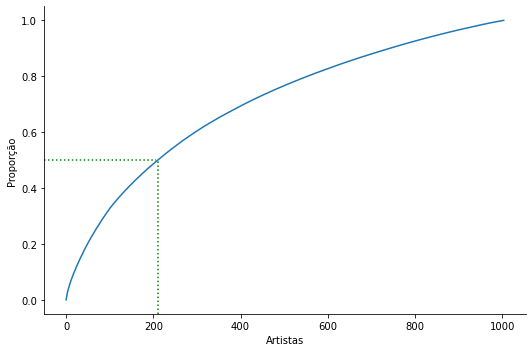

In [87]:
artists = list(df["artista"].value_counts())

total = sum(artists)
proportions = []
midpoint = None
for i in range(len(artists)):
    proportions.append(sum(artists[:i]) / total)
    if midpoint is None and proportions[-1] >= 0.5:
        midpoint = i

data = pd.DataFrame()
data["Proporção"] = proportions

g = sns.relplot(data=data, kind="line", aspect=1.5, legend=False)
g.ax.set_xlabel("Artistas")
g.ax.set_ylabel("Proporção")
g.ax.axvline(x=midpoint, ymax=0.5, color="g", linestyle="dotted")
g.ax.axhline(
    y=0.5, xmin=0, xmax=(midpoint / len(artists)) + 0.023, color="g", linestyle="dotted"
)

### Regras de Associação (Geral)


In [88]:
transactions = df.groupby("idUsuario")["artista"].aggregate(list)
transactions

idUsuario
5        [dream theater, ac/dc, metallica, iron maiden,...
9        [arch enemy, strapping young lad, kreator, chi...
14       [sonic youth, the fall, mogwai, the velvet und...
22       [the jam, maxïmo park, supergrass, simon & gar...
24       [the byrds, leonard cohen, the beatles, simon ...
                               ...                        
19688    [bullet for my valentine, escape the fate, 30 ...
19701    [placebo, animal collective, crystal castles, ...
19703    [the offspring, pearl jam, the smashing pumpki...
19708    [coldplay, amy winehouse, armin van buuren, mo...
19714    [misfits, type o negative, arch enemy, red hot...
Name: artista, Length: 3000, dtype: object

In [89]:
encoder = TransactionEncoder()
df_t = pd.DataFrame(encoder.fit_transform(transactions), columns=encoder.columns_)
df_t

,...and you will know us by the trail of dead,2pac,3 doors down,30 seconds to mars,311,36 crazyfists,44,50 cent,65daysofstatic,[unknown],...,wilco,within temptation,wolfgang amadeus mozart,wu-tang clan,yann tiersen,yeah yeah yeahs,yellowcard,yo la tengo,zero 7,Édith piaf
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2997,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [90]:
min_support = 0.01
file_path = f"data/itemsets_{min_support}.csv"

if not os.path.isfile(file_path):
    itemsets = apriori(df_t, min_support=min_support, use_colnames=True)
    itemsets.to_csv(file_path, index=False)
else:
    itemsets = pd.read_csv(file_path, converters={"itemsets": eval})

itemsets["itemsets"]

0        (...and you will know us by the trail of dead)
1                                                (2pac)
2                                        (3 doors down)
3                                  (30 seconds to mars)
4                                                 (311)
                             ...                       
1811                (radiohead, the beatles, sigur rós)
1812                 (radiohead, the cure, the beatles)
1813    (radiohead, the smashing pumpkins, the beatles)
1814        (radiohead, the white stripes, the beatles)
1815       (radiohead, the cure, the smashing pumpkins)
Name: itemsets, Length: 1816, dtype: object

In [91]:
itemsets["itemsets"].apply(len).describe()

count    1816.000000
mean        1.673458
std         0.558116
min         1.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         3.000000
Name: itemsets, dtype: float64

In [92]:
rules_gen = association_rules(
    itemsets, metric="confidence", min_threshold=0.5
).sort_values(by="lift", ascending=False)
rules_gen["absolute_support"] = (rules_gen["support"] * len(transactions)).apply(round)
rules_gen

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,absolute_support
2,(beyoncé),(rihanna),0.024667,0.045333,0.015333,0.621622,13.712242,0.014215,2.523048,46
22,(the pussycat dolls),(rihanna),0.017667,0.045333,0.010667,0.603774,13.318535,0.009866,2.409397,32
69,"(system of a down, slipknot)",(koЯn),0.020667,0.046000,0.012000,0.580645,12.622721,0.011049,2.274923,36
67,"(koЯn, system of a down)",(slipknot),0.022667,0.048667,0.012000,0.529412,10.878324,0.010897,2.021583,36
61,"(metallica, megadeth)",(iron maiden),0.017667,0.059333,0.010333,0.584906,9.857961,0.009285,2.266152,31
...,...,...,...,...,...,...,...,...,...,...
53,"(the cure, david bowie)",(radiohead),0.019667,0.169667,0.010333,0.525424,3.096800,0.006997,1.749631,31
23,(simon & garfunkel),(the beatles),0.026333,0.172000,0.014000,0.531646,3.090963,0.009471,1.767892,42
0,(andrew bird),(radiohead),0.020333,0.169667,0.010333,0.508197,2.995266,0.006883,1.688344,31
24,(the flaming lips),(the beatles),0.026667,0.172000,0.013667,0.512500,2.979651,0.009080,1.698462,41


In [93]:
rules_gen.describe()

,antecedent support,consequent support,support,confidence,lift,leverage,conviction,absolute_support
count,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000
mean,0.022120,0.126932,0.012466,0.571181,5.299400,0.009683,2.085507,37.397436
std,0.007160,0.044218,0.003607,0.060978,2.550384,0.002917,0.373761,10.822463
min,0.013667,0.045333,0.010000,0.500000,2.947920,0.006776,1.679657,30.000000
25%,0.018083,0.096000,0.010333,0.530540,3.315713,0.007903,1.839296,31.000000
50%,0.020667,0.160667,0.011333,0.549835,4.472748,0.008991,1.969791,34.000000
75%,0.023667,0.169667,0.013333,0.601869,6.295788,0.010300,2.200563,40.000000
max,0.059333,0.172000,0.031667,0.780488,13.712242,0.025081,3.782630,95.000000


### Regras de Associação (Sexo Masculino)


In [94]:
transactions = df[df["sexo"] == "m"].groupby("idUsuario")["artista"].aggregate(list)
transactions

idUsuario
5        [dream theater, ac/dc, metallica, iron maiden,...
9        [arch enemy, strapping young lad, kreator, chi...
14       [sonic youth, the fall, mogwai, the velvet und...
22       [the jam, maxïmo park, supergrass, simon & gar...
24       [the byrds, leonard cohen, the beatles, simon ...
                               ...                        
19677    [doves, the new pornographers, the weakerthans...
19685    [philip glass, rammstein, pink floyd, moby, bl...
19688    [bullet for my valentine, escape the fate, 30 ...
19708    [coldplay, amy winehouse, armin van buuren, mo...
19714    [misfits, type o negative, arch enemy, red hot...
Name: artista, Length: 2219, dtype: object

In [95]:
encoder = TransactionEncoder()
df_t = pd.DataFrame(encoder.fit_transform(transactions), columns=encoder.columns_)

In [96]:
min_support = 0.01
file_path = f"data/itemsets_sexo_{min_support}.csv"

if not os.path.isfile(file_path):
    itemsets = apriori(df_t, min_support=min_support, use_colnames=True)
    itemsets.to_csv(file_path, index=False)
else:
    itemsets = pd.read_csv(file_path, converters={"itemsets": eval})

In [97]:
itemsets["itemsets"].apply(len).describe()

count    1622.000000
mean        1.638718
std         0.552203
min         1.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         3.000000
Name: itemsets, dtype: float64

In [98]:
rules_male = association_rules(
    itemsets, metric="confidence", min_threshold=0.5
).sort_values(by="lift", ascending=False)
rules_male["absolute_support"] = (rules_male["support"] * len(transactions)).apply(
    round
)
rules_male

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,absolute_support
27,(kreator),(slayer),0.015773,0.043713,0.010365,0.657143,15.032990,0.009676,2.789169,23
39,"(ac/dc, iron maiden)",(judas priest),0.022533,0.035151,0.011717,0.520000,14.793333,0.010925,2.010102,26
10,(death),(slayer),0.018026,0.043713,0.010816,0.600000,13.725773,0.010028,2.390717,24
74,"(slipknot, linkin park)",(koЯn),0.016224,0.054078,0.011266,0.694444,12.841435,0.010389,3.095743,25
56,"(slipknot, disturbed)",(koЯn),0.017125,0.054078,0.010816,0.631579,11.678947,0.009890,2.567501,24
...,...,...,...,...,...,...,...,...,...,...
49,"(coldplay, sigur rós)",(radiohead),0.022533,0.161785,0.011717,0.520000,3.214150,0.008072,1.746282,26
45,"(radiohead, bob dylan)",(the beatles),0.021181,0.161334,0.010816,0.510638,3.165102,0.007399,1.713796,24
48,"(oasis, coldplay)",(radiohead),0.020279,0.161785,0.010365,0.511111,3.159208,0.007084,1.714532,23
90,"(red hot chili peppers, pink floyd)",(radiohead),0.020279,0.161785,0.010365,0.511111,3.159208,0.007084,1.714532,23


In [99]:
rules_male.describe()

,antecedent support,consequent support,support,confidence,lift,leverage,conviction,absolute_support
count,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000
mean,0.023177,0.107498,0.013035,0.569987,6.276209,0.010527,2.119001,28.924731
std,0.007943,0.039533,0.003991,0.056576,2.902529,0.003173,0.350450,8.855404
min,0.015322,0.035151,0.010365,0.500000,3.090529,0.007084,1.676431,23.000000
25%,0.018927,0.064443,0.010816,0.526316,4.069469,0.008642,1.871113,24.000000
50%,0.020730,0.111311,0.011717,0.547619,5.285522,0.009890,1.988111,26.000000
75%,0.023885,0.142857,0.013970,0.607843,8.300049,0.011018,2.289038,31.000000
max,0.072555,0.161785,0.038756,0.750000,15.032990,0.029470,3.488058,86.000000


### Regras de Associação (Estados Unidos)

In [100]:
transactions = (
    df[df["pais"] == "United States"].groupby("idUsuario")["artista"].aggregate(list)
)
transactions

idUsuario
9        [arch enemy, strapping young lad, kreator, chi...
32       [nick cave and the bad seeds, black flag, the ...
44       [girl talk, roxette, kings of leon, my morning...
45       [the dandy warhols, the beatles, the stone ros...
177      [john williams, death cab for cutie, the white...
                               ...                        
19625    [reel big fish, green day, queen, tenacious d,...
19632    [sage francis, regina spektor, cocteau twins, ...
19649    [norah jones, phoenix, no doubt, black eyed pe...
19650    [the mountain goats, saves the day, against me...
19701    [placebo, animal collective, crystal castles, ...
Name: artista, Length: 566, dtype: object

In [101]:
encoder = TransactionEncoder()
df_t = pd.DataFrame(encoder.fit_transform(transactions), columns=encoder.columns_)

In [102]:
min_support = 0.02
file_path = f"data/itemsets_pais_{min_support}.csv"

if not os.path.isfile(file_path):
    itemsets = apriori(df_t, min_support=min_support, use_colnames=True)
    itemsets.to_csv(file_path, index=False)
else:
    itemsets = pd.read_csv(file_path, converters={"itemsets": eval})

In [103]:
itemsets["itemsets"].apply(len).describe()

count    812.000000
mean       1.694581
std        0.660919
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        4.000000
Name: itemsets, dtype: float64

In [104]:
rules_us = association_rules(
    itemsets, metric="confidence", min_threshold=0.5
).sort_values(by="lift", ascending=False)
rules_us["absolute_support"] = (rules_us["support"] * len(transactions)).apply(round)
rules_us

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,absolute_support
53,(say anything),(taking back sunday),0.040636,0.051237,0.021201,0.521739,10.182909,0.019119,1.983778,12
29,(frou frou),(imogen heap),0.038869,0.056537,0.021201,0.545455,9.647727,0.019004,2.075618,12
178,"(death cab for cutie, beck)","(radiohead, modest mouse)",0.035336,0.068905,0.021201,0.600000,8.707692,0.018767,2.327739,12
171,(wilco),"(radiohead, the beatles)",0.030035,0.104240,0.021201,0.705882,6.771685,0.018071,3.045583,12
182,"(death cab for cutie, beck)","(radiohead, the beatles)",0.035336,0.104240,0.021201,0.600000,5.755932,0.017518,2.239399,12
...,...,...,...,...,...,...,...,...,...,...
35,(john mayer),(the beatles),0.051237,0.268551,0.026502,0.517241,1.926044,0.012742,1.515144,15
4,(arcade fire),(the beatles),0.079505,0.268551,0.040636,0.511111,1.903216,0.019285,1.496145,23
68,"(beck, coldplay)",(the beatles),0.042403,0.268551,0.021201,0.500000,1.861842,0.009814,1.462898,12
12,(boards of canada),(the beatles),0.060071,0.268551,0.030035,0.500000,1.861842,0.013903,1.462898,17


In [105]:
rules_us.describe()

,antecedent support,consequent support,support,confidence,lift,leverage,conviction,absolute_support
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,0.045420,0.211335,0.027426,0.624237,3.193536,0.017720,inf,15.523077
std,0.018817,0.051999,0.009846,0.109778,1.199426,0.005902,NaN,5.572690
min,0.021201,0.051237,0.021201,0.500000,1.861842,0.009814,1.462898,12.000000
25%,0.035336,0.181979,0.021201,0.540570,2.345130,0.014450,1.747114,12.000000
50%,0.040636,0.233216,0.022968,0.600000,2.976537,0.016257,1.963251,13.000000
75%,0.052120,0.233216,0.030035,0.685855,3.757387,0.018779,2.453887,17.000000
max,0.134276,0.268551,0.081272,1.000000,10.182909,0.049957,inf,46.000000


### Regras de Associação (Mistura)

In [106]:
# Misturar artistas e características dos usuários
df_info = df.groupby("idUsuario").first()
df_info["idUsuario"] = df_info.index

df_gender = df_info[["idUsuario", "sexo"]].rename(columns={"sexo": "item"})
df_country = df_info[["idUsuario", "pais"]].rename(columns={"pais": "item"})

df_mix = df[["idUsuario", "artista"]].rename(columns={"artista": "item"})
df_mix = pd.concat([df_mix, df_gender, df_country], ignore_index=True)
df_mix

,idUsuario,item
0,5,dream theater
1,5,ac/dc
2,5,metallica
3,5,iron maiden
4,5,bob marley & the wailers
...,...,...
64450,19688,Italy
64451,19701,United States
64452,19703,Poland
64453,19708,Brazil


In [107]:
transactions = df_mix.groupby("idUsuario")["item"].aggregate(list)
transactions

idUsuario
5        [dream theater, ac/dc, metallica, iron maiden,...
9        [arch enemy, strapping young lad, kreator, chi...
14       [sonic youth, the fall, mogwai, the velvet und...
22       [the jam, maxïmo park, supergrass, simon & gar...
24       [the byrds, leonard cohen, the beatles, simon ...
                               ...                        
19688    [bullet for my valentine, escape the fate, 30 ...
19701    [placebo, animal collective, crystal castles, ...
19703    [the offspring, pearl jam, the smashing pumpki...
19708    [coldplay, amy winehouse, armin van buuren, mo...
19714    [misfits, type o negative, arch enemy, red hot...
Name: item, Length: 3000, dtype: object

In [108]:
encoder = TransactionEncoder()
df_t = pd.DataFrame(encoder.fit_transform(transactions), columns=encoder.columns_)

In [109]:
min_support = 0.01
file_path = f"data/itemsets_mix_{min_support}.csv"

if not os.path.isfile(file_path):
    itemsets = apriori(df_t, min_support=min_support, use_colnames=True)
    itemsets.to_csv(file_path, index=False)
else:
    itemsets = pd.read_csv(file_path, converters={"itemsets": eval})

In [110]:
itemsets["itemsets"].apply(len).describe()

count    3122.000000
mean        1.972133
std         0.649988
min         1.000000
25%         2.000000
50%         2.000000
75%         2.000000
max         4.000000
Name: itemsets, dtype: float64

In [111]:
rules_mix = association_rules(
    itemsets, metric="confidence", min_threshold=0.5
).sort_values(by="lift", ascending=False)
rules_mix["absolute_support"] = (rules_mix["support"] * len(transactions)).apply(round)

# Remover 'não-artistas' dos consequentes.
blacklist = list(df["sexo"].unique()) + list(df["pais"].unique())
mask = rules_mix["consequents"].apply(lambda x: any(b in x for b in blacklist))
rules_mix = rules_mix[~mask]
rules_mix

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,absolute_support
95,(beyoncé),(rihanna),0.024667,0.045333,0.015333,0.621622,13.712242,0.014215,2.523048,46
1115,"(m, system of a down, slipknot)",(koЯn),0.017333,0.046000,0.010667,0.615385,13.377926,0.009869,2.480400,32
537,(the pussycat dolls),(rihanna),0.017667,0.045333,0.010667,0.603774,13.318535,0.009866,2.409397,32
906,"(system of a down, slipknot)",(koЯn),0.020667,0.046000,0.012000,0.580645,12.622721,0.011049,2.274923,36
1112,"(koЯn, m, system of a down)",(slipknot),0.019333,0.048667,0.010667,0.551724,11.336797,0.009726,2.122205,32
...,...,...,...,...,...,...,...,...,...,...
806,"(sigur rós, f)",(radiohead),0.025000,0.169667,0.013000,0.520000,3.064833,0.008758,1.729861,39
1069,"(m, the beach boys)",(the beatles),0.021667,0.172000,0.011333,0.523077,3.041145,0.007607,1.736129,34
60,(andrew bird),(radiohead),0.020333,0.169667,0.010333,0.508197,2.995266,0.006883,1.688344,31
539,(the flaming lips),(the beatles),0.026667,0.172000,0.013667,0.512500,2.979651,0.009080,1.698462,41


In [112]:
rules_mix.describe()

,antecedent support,consequent support,support,confidence,lift,leverage,conviction,absolute_support
count,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000
mean,0.022291,0.123756,0.012493,0.568119,5.456829,0.009754,2.078694,37.478992
std,0.007003,0.045485,0.003502,0.061030,2.597210,0.002832,0.378310,10.505728
min,0.013667,0.045333,0.010000,0.500000,2.947920,0.006776,1.679657,30.000000
25%,0.018333,0.084000,0.010667,0.526671,3.313461,0.008081,1.834520,32.000000
50%,0.020667,0.113667,0.011333,0.543860,4.636990,0.009116,1.955800,34.000000
75%,0.024667,0.169667,0.013333,0.596154,6.651081,0.010381,2.186468,40.000000
max,0.059333,0.172000,0.031667,0.780488,13.712242,0.025081,3.782630,95.000000
